# Make Classification data and get it ready

In [ ]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# make circles

X , y = make_circles(n_samples ,
                     noise = 0.03 ,
                     random_state = 42)


In [ ]:
print(f"first 5 samples of x: \n{X[:5]}")
print(f"first 5 samples of y: \n{y[:5]}")

first 5 samples of x: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: 
[1 1 1 1 0]


In [ ]:
# make dataframe of circles data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                           "X2": X[:,1],
                           "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


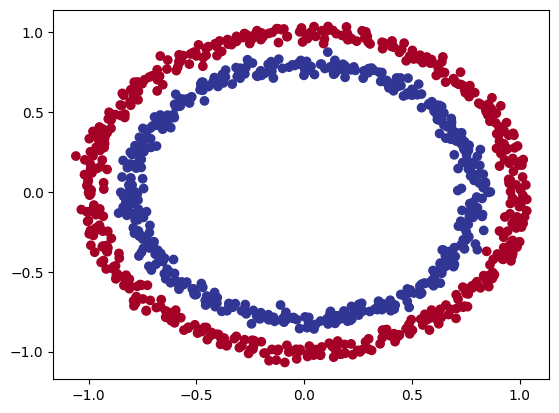

In [ ]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
             c = y,
            cmap = plt.cm.RdYlBu)
plt.show()


**note**:- the data we are working on is often referred as a toy dataset , a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

In [ ]:
X_sample = X[0]
y_sample = y[0]
print(f"X sample: {X_sample} and X sample size{X_sample.size}")
print(f"y sample: {y_sample} and y sample size{y_sample.size}")

X sample: [0.75424625 0.23148074] and X sample size2
y sample: 1 and y sample size1


# turn data into tensor

In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=0.7 , test_size=0.3 , random_state=42)

In [ ]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(700, 300, 700, 300)

# building model
   here we classify between red dots and blue dots

In [ ]:
from torch import nn
device = "cpu"

class CircleModelV1 (nn.Module):
  def __init__(self):
    super().__init__()
# create 2 nn.linear layers capable of handling the shape of our data
    self.layer1 = nn.Linear(in_features=2 , out_features=5)
    # take 2 features and upscales to 5 features
    self.layer2 = nn.Linear(in_features=5 , out_features=1)


    # take 5 features from previous layer and o/p is 1 feature
  def forward(self , x):
    return self.layer2(self.layer1(x))
# X -> layer 1 (where 2 features increase to 5) and -> layer 2 (where 5 feature to 1) -> o/p









# **nn.Sequential**
it is a container module used to stack multiple layers in a sequential manner. This is used only when model is simple and straight forward though for complex it can also be used.  note:- **using sequential is need not need to write forward pass **

In [ ]:
model_x = nn.Sequential(
    nn.Linear(in_features=2 , out_features=5),
    nn.Linear(in_features=5 , out_features=1)
    )
model_x

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_x.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('0.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('1.bias', tensor([-0.2060]))])

In [ ]:

# model object to target device ie cuda
model_0 = CircleModelV1().to(device)
next(model_0.parameters()).device


device(type='cpu')

# **Loss Function and optimiizer **

loss function is used according to model what we are working


for example **for regression** we use Mean Absolute Error (MAE) or Mean Squared Error (MSE)




similary **for classification** we use Binary Cross-Entropy (BCE) or Categorical Cross-Entropy




while **Optimizers**: we use SGD or ADAM used for  model

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation is buildin
optimizer = torch.optim.SGD(params=model_0.parameters() , lr=0.1)



In [ ]:
def accuracy_fn(y_true , y_pred):
  correct = torch.eq(y_true , y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

# Train model

our output from model is **logits** so we convert logits into predicitions probabiility by passing them in activation function ( e.g sigmoid for binary classification and softmax for multiclass classification )

then we convert our model's prediction probalities to **pred labels** by either rounding them or argmax()

In [ ]:
model_0

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [ ]:
x=torch.round(y_pred_probs)

In [ ]:
print(torch.eq(x.squeeze(),y_pred_probs.squeeze()))

tensor([False, False, False, False, False])


In [ ]:
torch.manual_seed(42)
X_test , y_test = X_test.to(device) ,y_test.to(device)
X_train , y_train = X_train.to(device) , y_train.to(device)
epochs = 1000
for epoch in range(epochs):
  model_0.train()
  #1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  #  loss = loss_fn(torch.sigmoid(y_logits) , y_train) if BCELoss then expect prediction probailities

  #2. calculate loss
  loss = loss_fn(y_logits , y_train) # we using BCEWithLogits so it expects raw logits
  acc = accuracy_fn(y_train , y_pred)
  #3. optm to zero grad
  optimizer.zero_grad()
  #4. backprogagation
  loss.backward()
  #5. optimizer step upadate parameter to reduce gradient decent
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    #1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. test loss / accuracy
    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_test , test_pred)
  if epoch % 100 == 0:
    print(f"epoch: {epoch} , loss: {loss: .5f} , acc: {acc: .2f}% | test_loss: {test_loss: .5f} , test_acc: {test_acc: .2f}%")


epoch: 0 , loss:  0.69705 , acc:  52.71% | test_loss:  0.69758 , test_acc:  54.00%
epoch: 100 , loss:  0.69314 , acc:  50.86% | test_loss:  0.69381 , test_acc:  48.00%
epoch: 200 , loss:  0.69292 , acc:  50.86% | test_loss:  0.69428 , test_acc:  48.00%
epoch: 300 , loss:  0.69285 , acc:  50.86% | test_loss:  0.69457 , test_acc:  48.00%
epoch: 400 , loss:  0.69282 , acc:  59.43% | test_loss:  0.69477 , test_acc:  57.00%
epoch: 500 , loss:  0.69280 , acc:  56.00% | test_loss:  0.69491 , test_acc:  53.00%
epoch: 600 , loss:  0.69280 , acc:  55.00% | test_loss:  0.69501 , test_acc:  51.00%
epoch: 700 , loss:  0.69279 , acc:  54.43% | test_loss:  0.69508 , test_acc:  51.67%
epoch: 800 , loss:  0.69279 , acc:  54.14% | test_loss:  0.69513 , test_acc:  51.67%
epoch: 900 , loss:  0.69279 , acc:  53.86% | test_loss:  0.69516 , test_acc:  50.67%


# how sigmoid works
 convert predicted output of model into range of 0 to 1 so that less than 0.5 means class having 0 index is predicted or 0.5 or greater than it means class having index 1 is predicted

# Make predictions and evaluate the model

our model is not learning so we do some predictions and visualize visualize and visualize

to do we import 'plot_decision_boundary'



https://madewithml.com/courses/foundations/neural-networks/

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


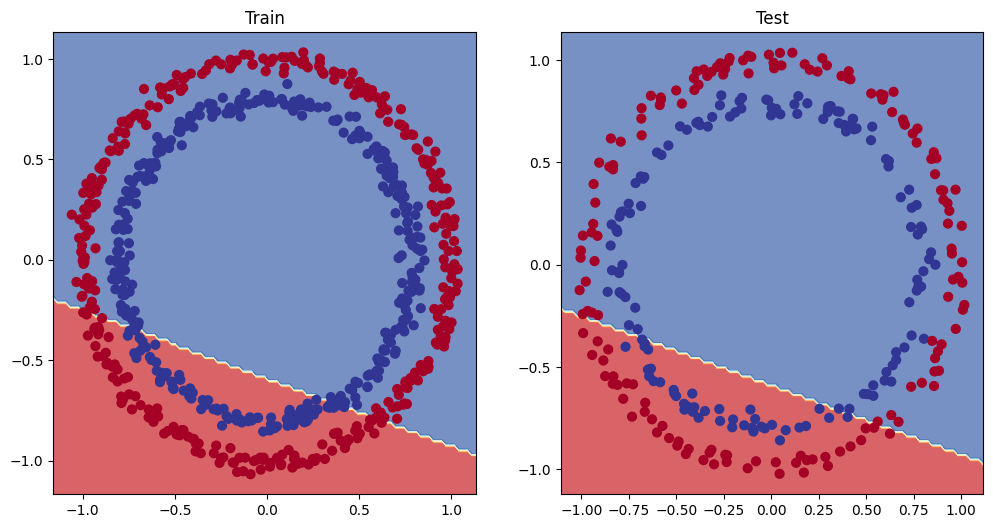

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0 , X_train , y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0 , X_test , y_test)

**Ways to improve model**

1.  adding more layers
2. adding more hidden units i.e.
 parameters
3.  fit for longer ( increase epochs )
4.  changing activation layer
5.  changing learning rate
6.  changing loss function

these option are all from a **model perspective** because they deal directly with the model, rather than data


parameters are weight and bais that we cant change but **hyperparameters** for example :- hidden units , layers ,activation functiion,etc can be change by us



In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 , out_features=10)
    self.relu = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=10 , out_features=10)
    self.layer_3 = nn.Linear(in_features=10 , out_features=1)

  def forward(self , x):
    z = self.layer_1(x)
    z = self.relu(z)
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)
    return z



In [ ]:
model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters() , lr=0.1)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1500
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  # forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # loss fn / acc
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_train , y_pred)
  # zero grad
  optimizer.zero_grad()
  # backpropagation
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_test , test_pred)

  if epoch % 100 == 0:
    print(f"epoch: {epoch} | train loss: {loss: .5f} , train accuracy: {acc: .2f} | test loss: {test_loss: .5f}% , test accuracy: {test_acc: .2f}%")

epoch: 0 | train loss:  0.69276 , train accuracy:  50.86 | test loss:  0.69354% , test accuracy:  48.00%
epoch: 100 | train loss:  0.69105 , train accuracy:  51.00 | test loss:  0.69185% , test accuracy:  48.00%
epoch: 200 | train loss:  0.68962 , train accuracy:  70.71 | test loss:  0.69032% , test accuracy:  69.33%
epoch: 300 | train loss:  0.68771 , train accuracy:  68.86 | test loss:  0.68829% , test accuracy:  68.67%
epoch: 400 | train loss:  0.68478 , train accuracy:  63.00 | test loss:  0.68537% , test accuracy:  64.33%
epoch: 500 | train loss:  0.68019 , train accuracy:  59.00 | test loss:  0.68093% , test accuracy:  60.00%
epoch: 600 | train loss:  0.67364 , train accuracy:  61.14 | test loss:  0.67483% , test accuracy:  62.33%
epoch: 700 | train loss:  0.66328 , train accuracy:  68.43 | test loss:  0.66536% , test accuracy:  67.33%
epoch: 800 | train loss:  0.64678 , train accuracy:  71.14 | test loss:  0.65023% , test accuracy:  72.67%
epoch: 900 | train loss:  0.61611 , tra

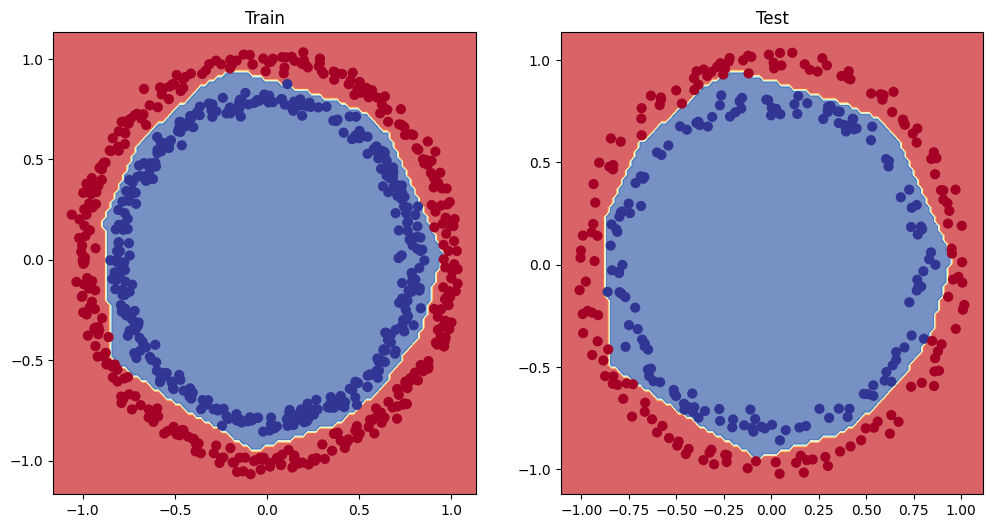

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1 , X_train , y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1 , X_test , y_test)

**Evaluating a model trained with non linear activation functions**

In [ ]:
# make predictions
model_1.eval()
with torch.inference_mode():
  y_logist = model_1(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logist))
y_pred[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

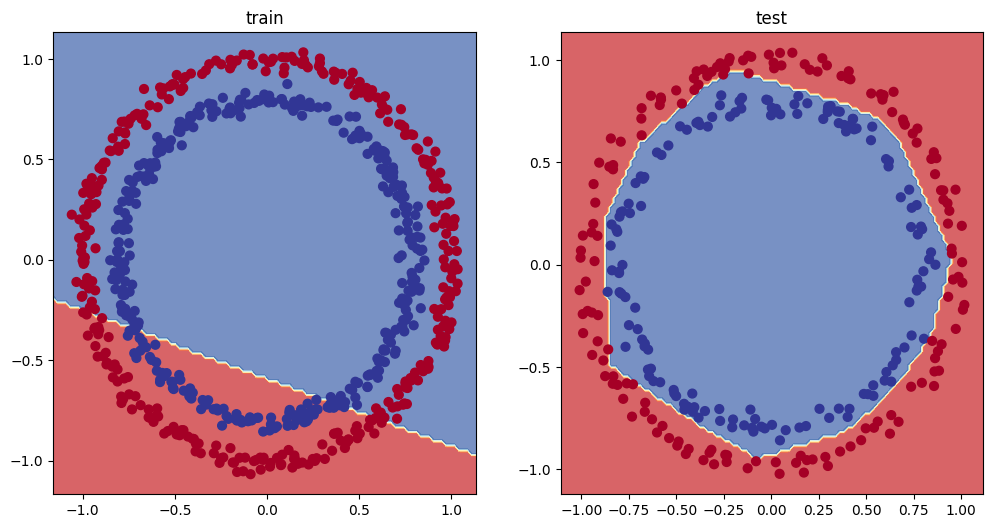

In [ ]:
#plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0 , X_train , y_train) # model_0 do not have non-linearity
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1 , X_test , y_test) # model_1 have non-linearity

**Replicating non linear activation functiions**

Neural networks, rather than us telling model what to learn, we give it tools to discover patterns in data and it tries to fig out the pattern on its own.

and those tools are linear and non linear functions

In [ ]:
A = torch.arange(-10,10,1,dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

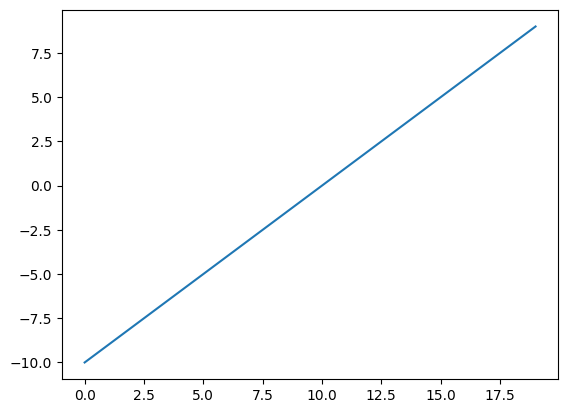

In [ ]:
plt.plot(A)

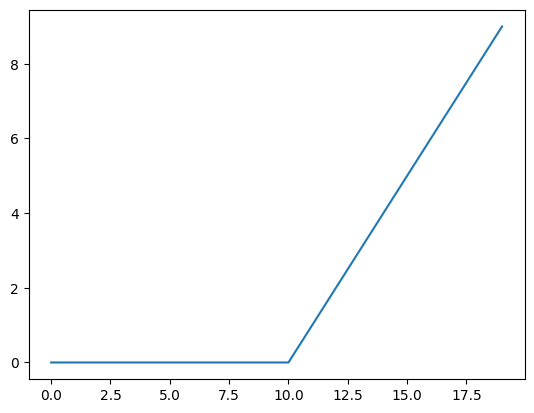

In [ ]:
A = torch.relu(A)
plt.plot(A)

In [ ]:
# we are making reluu function that act like relu activation function
def reluu(x):
  return torch.maximum(torch.tensor(0),x)

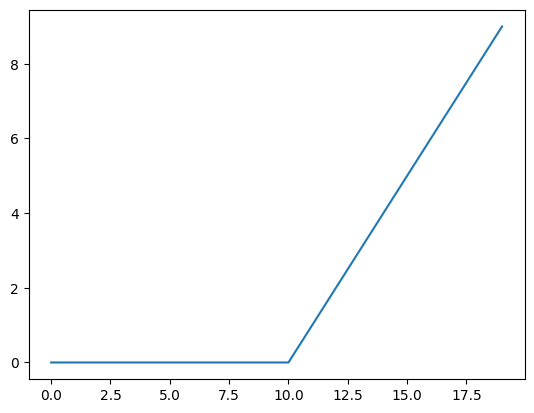

In [ ]:
plt.plot(reluu(A))

In [ ]:
# for sigmoid
def sigmoidd(x):
  return 1 / (1 + torch.exp(-x))

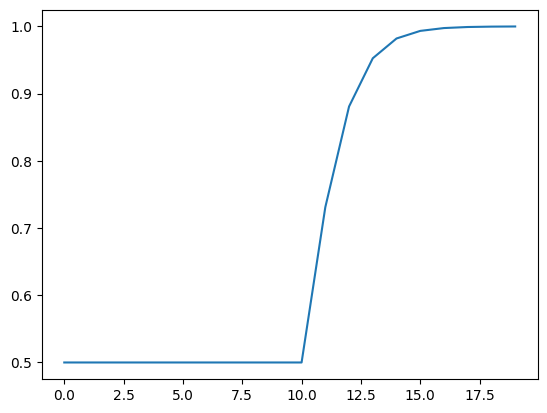

In [ ]:
plt.plot(sigmoidd(A))

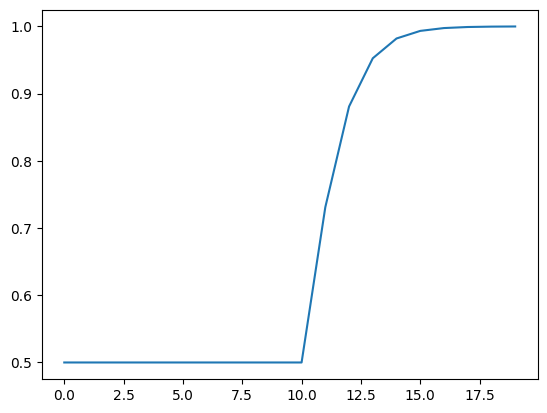

In [ ]:
plt.plot(torch.sigmoid(A))

# **putting all together with multi-class classification problem**

1. binary classification ( cat vs dog , spam or not spam , fraud or not fraud )

2. multi-class classification ( cat vs dog vs chicken )

# creating a toy multi class dataset

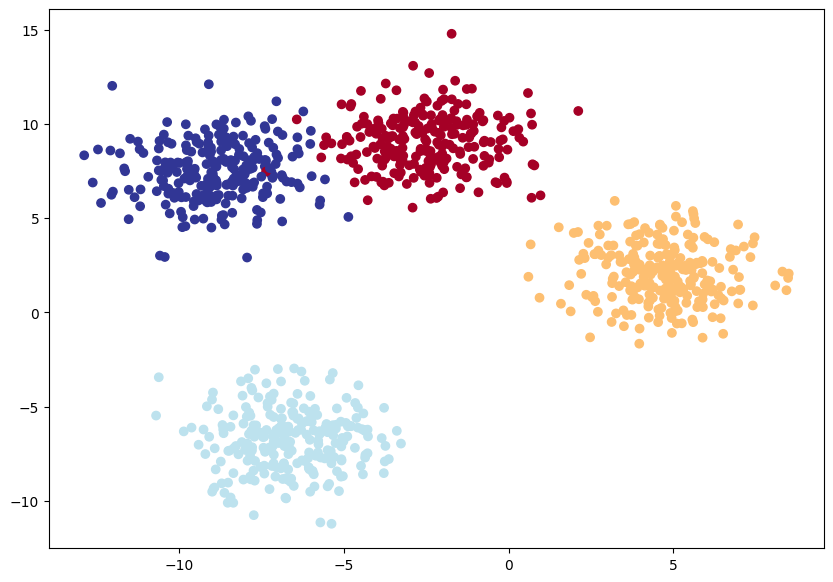

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. create multi class data
X_blob , y_blob = make_blobs(n_samples = 1000,
                             n_features = NUM_FEATURES,
                             centers=NUM_CLASSES,
                             cluster_std=1.5,
                             random_state = RANDOM_SEED)

#2. turn data into tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3. split into train and test
X_blob_train , X_blob_test , y_blob_train , y_blob_test = train_test_split(X_blob , y_blob , test_size=0.2 , random_state=RANDOM_SEED)

#4. plot data (visualizing data)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],
            X_blob[:,1],
            c=y_blob,
            cmap=plt.cm.RdYlBu)

# building multi class classification model

In [ ]:
## device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
class BlobModel(nn.Module):
  def __init__(self , input_features , output_features , hidden_units=8):
    """ initializes multi class classification model

    args:
    input_features (int) : no of input features to the model
    output features (int) : no of o/p features (no of output classes)
    hidden units (int) : no of hidden units betn layers default 8

    returns :

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units , out_features = 16),
        nn.ReLU(),
        nn.Linear(in_features= 16 , out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units , out_features=16),
        nn.ReLU(),
        nn.Linear(in_features = 16 , out_features = output_features)
    )

  def forward(self , x):
    return self.linear_layer_stack(x)


model_blob = BlobModel(2,4)


# creating loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_blob.parameters(), lr=0.1)

# Why Does Softmax Convert Logits into a Probability Distribution (Sum to 1)?
In multi-class classification, you're predicting one class out of many. Softmax ensures that:

Each class gets a probability between 0 and 1.

# Example of Softmax:
If the logits are [2, 1, 0.5] for 3 classes, after applying softmax, the probabilities might be [0.65, 0.25, 0.10]. The model is 65% confident in class 1, 25% confident in class 2, and 10% confident in class 3.


# building train and test loop

for training and testing our model , we have to convert logists whiich is Raw
to pred probabiilities and then to pred labels

raw logist -> pred prob -> pred labels


In [ ]:
model_blob.eval()
with torch.inference_mode():
  y_pred = model_blob(X_blob_test)
y_pred_probs = torch.softmax(y_pred[:5], dim=1)
print(y_pred_probs) # pred prob
print(y_pred[:5]) # raw logist

tensor([[0.2749, 0.2266, 0.2916, 0.2070],
        [0.2749, 0.1944, 0.2763, 0.2544],
        [0.2781, 0.2257, 0.2740, 0.2222],
        [0.2734, 0.2297, 0.2812, 0.2156],
        [0.2925, 0.2028, 0.2830, 0.2216]])
tensor([[-0.0213, -0.2146,  0.0378, -0.3050],
        [-0.0060, -0.3522, -0.0008, -0.0833],
        [-0.0428, -0.2516, -0.0575, -0.2671],
        [-0.0528, -0.2270, -0.0248, -0.2903],
        [ 0.0610, -0.3052,  0.0282, -0.2164]])


In [ ]:
print(torch.sum(y_pred_probs[0]))
print(torch.max(y_pred_probs[0]))

tensor(1.)
tensor(0.2916)


**torch.max** can give maximum value of single tensor or also by comparing two tensor where as **torch.maximum** only compare two tensor and give maximum value

In [ ]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0])

#  connverting pred probabilities to pred labels

In [ ]:
y_pred = torch.argmax(y_pred_probs , dim=1)
y_pred # pred labels

tensor([2, 2, 0, 2, 0])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1500
for epoch in range(epochs):
  model_blob.train()
  y_logists = model_blob(X_blob_train)
  y_pred = torch.argmax(torch.softmax(y_logists , dim=1),dim=1)
  # y_pred = torch.softmax(y_logists,dim=1).argmax(dim=1)
  loss = loss_fn(y_logists , y_blob_train)
  acc = accuracy_fn(y_blob_train , y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_blob.eval()
  with torch.inference_mode():
    test_logists = model_blob(X_blob_test)
    test_pred = torch.softmax(test_logists,dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logists , y_blob_test)
    test_acc = accuracy_fn(y_blob_test , test_pred)
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | train loss:{loss: .4f} , train accuracy{acc:.2f}% | test loss: {test_loss:.4f} , test accuracy{test_acc:.2f}%")

epoch: 0 | train loss: 1.3479 , train accuracy25.12% | test loss: 1.3220 , test accuracy39.50%
epoch: 100 | train loss: 0.0760 , train accuracy99.38% | test loss: 0.0672 , test accuracy99.50%
epoch: 200 | train loss: 0.0332 , train accuracy99.38% | test loss: 0.0222 , test accuracy99.50%
epoch: 300 | train loss: 0.0264 , train accuracy99.38% | test loss: 0.0150 , test accuracy99.50%
epoch: 400 | train loss: 0.0238 , train accuracy99.50% | test loss: 0.0120 , test accuracy99.50%
epoch: 500 | train loss: 0.0228 , train accuracy99.38% | test loss: 0.0108 , test accuracy99.50%
epoch: 600 | train loss: 0.0219 , train accuracy99.38% | test loss: 0.0101 , test accuracy99.50%
epoch: 700 | train loss: 0.0212 , train accuracy99.50% | test loss: 0.0097 , test accuracy99.50%
epoch: 800 | train loss: 0.0207 , train accuracy99.50% | test loss: 0.0093 , test accuracy99.50%
epoch: 900 | train loss: 0.0203 , train accuracy99.50% | test loss: 0.0090 , test accuracy99.50%
epoch: 1000 | train loss: 0.0202

In [ ]:
torch.cuda.manual_seed(42)
epochs = 1500
for epoch in range(epochs):
    model_blob.train()

    # Forward pass for training
    y_logists = model_blob(X_blob_train)

    # Use argmax directly on raw logits to get the predicted class
    y_pred = torch.argmax(y_logists, dim=1)

    # Compute loss (CrossEntropyLoss expects raw logits, not softmaxed probabilities)
    loss = loss_fn(y_logists, y_blob_train)

    # Calculate accuracy
    acc = accuracy_fn(y_blob_train, y_pred)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_blob.eval()
    with torch.inference_mode():
        # Forward pass for testing
        test_logists = model_blob(X_blob_test)

        # Use argmax on test logits to get the predicted class
        test_pred = torch.argmax(test_logists, dim=1)

        # Compute test loss and accuracy
        test_loss = loss_fn(test_logists, y_blob_test)
        test_acc = accuracy_fn(y_blob_test, test_pred)

    # Print results every 100 epochs
    if epoch % 100 == 0:
        print(f"epoch: {epoch} | train loss: {loss:.4f}, train accuracy: {acc:.2f}% | "
              f"test loss: {test_loss:.4f}, test accuracy: {test_acc:.2f}%")


epoch: 0 | train loss: 0.0214, train accuracy: 99.38% | test loss: 0.0104, test accuracy: 99.50%
epoch: 100 | train loss: 0.0201, train accuracy: 99.38% | test loss: 0.0092, test accuracy: 99.50%
epoch: 200 | train loss: 0.0195, train accuracy: 99.50% | test loss: 0.0085, test accuracy: 99.50%
epoch: 300 | train loss: 0.0190, train accuracy: 99.50% | test loss: 0.0080, test accuracy: 99.50%
epoch: 400 | train loss: 0.0187, train accuracy: 99.50% | test loss: 0.0076, test accuracy: 99.50%
epoch: 500 | train loss: 0.0185, train accuracy: 99.50% | test loss: 0.0074, test accuracy: 99.50%
epoch: 600 | train loss: 0.0182, train accuracy: 99.50% | test loss: 0.0071, test accuracy: 99.50%
epoch: 700 | train loss: 0.0180, train accuracy: 99.50% | test loss: 0.0069, test accuracy: 100.00%
epoch: 800 | train loss: 0.0178, train accuracy: 99.50% | test loss: 0.0066, test accuracy: 100.00%
epoch: 900 | train loss: 0.0176, train accuracy: 99.50% | test loss: 0.0064, test accuracy: 100.00%
epoch: 10

# making and evaluating predictions with a putorch multi class model

In [ ]:
# make predictions
model_blob.eval()
with torch.inference_mode():
  y_logists = model_blob(X_blob_test)
  y_pred =torch.softmax(y_logists , dim=1).argmax(dim=1)
y_pred[:5]

tensor([1, 3, 2, 1, 0])

In [ ]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0])

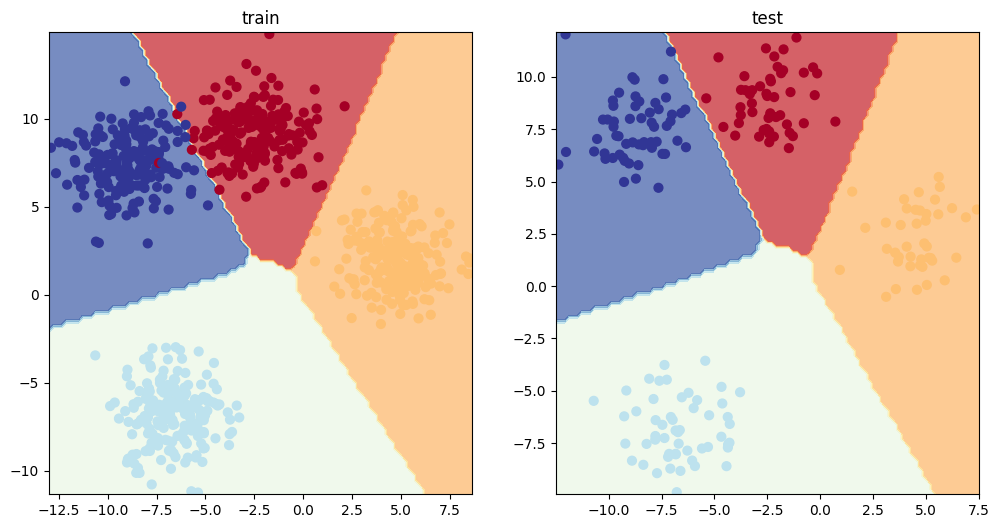

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_blob , X_blob_train , y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_blob , X_blob_test , y_blob_test)

# plt.subplot(1, 2, 1)
 -> creates a grid with 1 row and 2 columns, and it specifies that you are working on the first subplot (the left one).

# a few more classiffiication metrics... (to evaluate our classification model)

1.   accuracy - out of 100 samples, how many does our model get right?
2.   precision
3. Recall
4. F1- score
5. Confusion matrix
6. classification report










link :-  https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

Precision doesn't care if you find all true positives. It just wants to make sure that when you do predict a positive, it’s mostly right.


Goal: Minimize false positives (predicting positive but its negative).

Recall doesn't care if some of the positives you predicted are wrong. It just wants to catch all the actual true positives, even if that means including some false positives.


Goal: Minimize false negatives (predicting neg but its positive).

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import  Accuracy , Precision , Recall , F1Score

torchmetrics_acc = Accuracy(task="multiclass" , num_classes=4)
torchmetrics_acc(y_pred,y_blob_test)

tensor(1.)

In [ ]:
torchmetrics_precision = Precision(task="multiclass" , num_classes=4)
torchmetrics_precision(y_pred,y_blob_test)

tensor(1.)

In [ ]:
torchmetrics_recall = Recall(task="multiclass" , num_classes=4)
torchmetrics_recall(y_pred,y_blob_test)

tensor(1.)

In [ ]:
torchmetrics_f1 = F1Score(task="multiclass" , num_classes=4)
torchmetrics_f1(y_pred,y_blob_test)

tensor(1.)

# Exercises

#  Moon model
( **for binary classification** )

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch

X , y = make_moons(n_samples=1000,noise=0.1, random_state=42)
X_moon_train , X_moon_test , y_moon_train , y_moon_test = train_test_split(X , y , test_size=0.2 , random_state=42)


In [ ]:
X_moon_train = torch.from_numpy(X_moon_train).type(torch.float)
X_moon_test = torch.from_numpy(X_moon_test).type(torch.float)
y_moon_train = torch.from_numpy(y_moon_train).type(torch.float)
y_moon_test = torch.from_numpy(y_moon_test).type(torch.float)

In [ ]:
class MoonModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2 , out_features=8)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(in_features=8 , out_features=8)
    self.layer4 = nn.Linear(in_features=8 , out_features=1)
    self.layer3 = nn.Linear(in_features=8 , out_features=8)

  def forward(self , x):
    z = self.layer1(x)
    z = self.relu(z)
    z = self.layer2(z)
    z = self.relu(z)
    z = self.layer3(z)
    z = self.relu(z)
    z = self.layer4(z)
    return z

model_moon = MoonModel()


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_moon.parameters() , lr=0.1)

In [ ]:
epochs = 1000
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(epochs):
  model_moon.train()
  y_logists = model_moon(X_moon_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logists))
  loss = loss_fn(y_logists,y_moon_train)
  acc = torchmetrics_acc(y_pred,y_moon_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_moon.eval()
  with torch.inference_mode():
    test_logists = model_moon(X_moon_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logists))
    test_loss = loss_fn(test_logists , y_moon_test)
    test_acc = torchmetrics_acc(test_pred , y_moon_test)
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | train loss: {loss: .4f} , train accuracy: {acc: .2f} | test loss: {test_loss: .4f} , test accuracy: {test_acc: .2f}")

epoch: 0 | train loss:  0.6868 , train accuracy:  0.50 | test loss:  0.6873 , test accuracy:  0.50
epoch: 100 | train loss:  0.4672 , train accuracy:  0.84 | test loss:  0.4749 , test accuracy:  0.81
epoch: 200 | train loss:  0.2572 , train accuracy:  0.88 | test loss:  0.2528 , test accuracy:  0.88
epoch: 300 | train loss:  0.2295 , train accuracy:  0.89 | test loss:  0.2203 , test accuracy:  0.90
epoch: 400 | train loss:  0.1870 , train accuracy:  0.92 | test loss:  0.1750 , test accuracy:  0.93
epoch: 500 | train loss:  0.1075 , train accuracy:  0.96 | test loss:  0.0954 , test accuracy:  0.98
epoch: 600 | train loss:  0.0484 , train accuracy:  0.99 | test loss:  0.0396 , test accuracy:  1.00
epoch: 700 | train loss:  0.0277 , train accuracy:  0.99 | test loss:  0.0208 , test accuracy:  1.00
epoch: 800 | train loss:  0.0196 , train accuracy:  1.00 | test loss:  0.0136 , test accuracy:  1.00
epoch: 900 | train loss:  0.0155 , train accuracy:  1.00 | test loss:  0.0099 , test accuracy

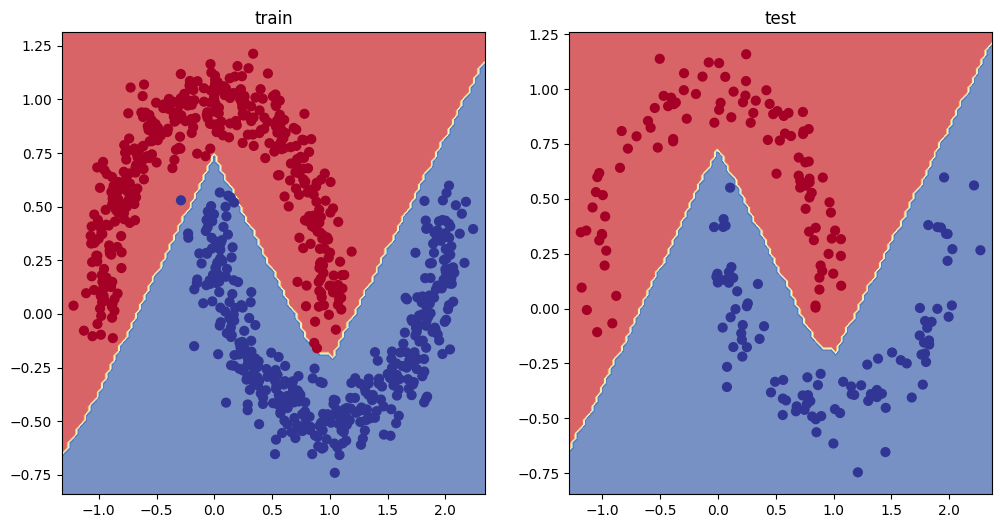

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_moon , X_moon_train , y_moon_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_moon , X_moon_test , y_moon_test)

# replicating Tanh activation function

In [ ]:
def tanH(x):
  return (torch.exp(x)-torch.exp(-x)) / (torch.exp(x)+torch.exp(-x))

In [ ]:
A = torch.arange(-10,10,1,dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

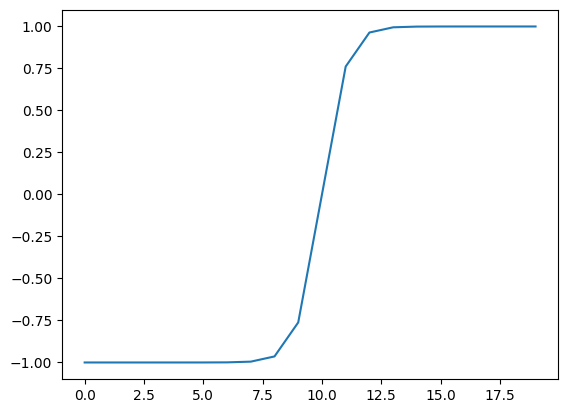

In [ ]:
plt.plot(torch.tanh(A))

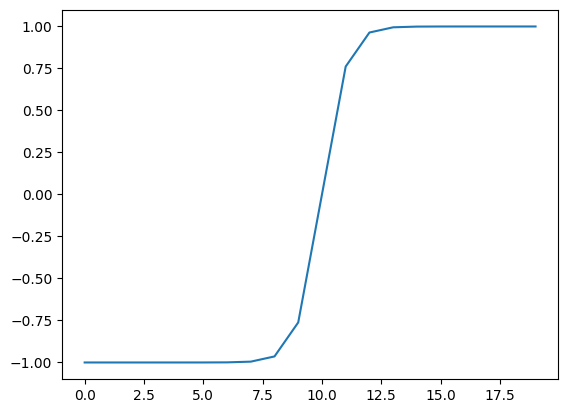

In [ ]:
plt.plot(tanH(A))

# sprial model
( **for multi class model** )

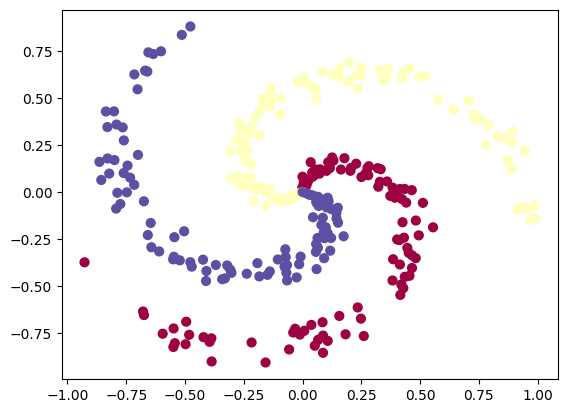

In [ ]:
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
X_sprial_train , X_sprial_test , y_sprial_train , y_sprial_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
X_sprial_train = torch.from_numpy(X_sprial_train).type(torch.float)
X_sprial_test = torch.from_numpy(X_sprial_test).type(torch.float)
y_sprial_train = torch.from_numpy(y_sprial_train).type(torch.LongTensor)
y_sprial_test = torch.from_numpy(y_sprial_test).type(torch.LongTensor)

In [ ]:
class SprialModel(nn.Module):
  def __init__(self , input_features , output_features , hidden_units=8):

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units , out_features = 16),
        nn.ReLU(),
        nn.Linear(in_features= 16 , out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units , out_features=16),
        nn.ReLU(),
        nn.Linear(in_features = 16 , out_features = output_features)
    )

  def forward(self , x):
    return self.linear_layer_stack(x)


model_sprial = SprialModel(2,3)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model_sprial.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1500
for epoch in range(epochs):
  model_sprial.train()
  y_logists = model_sprial(X_sprial_train)
  y_pred = torch.argmax(torch.softmax(y_logists , dim=1) , dim=1)
  # y_pred = torch.softmax(y_logists,dim=1).argmax(dim=1)
  loss = loss_fn(y_logists , y_sprial_train)
  acc = accuracy_fn(y_sprial_train , y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_blob.eval()
  with torch.inference_mode():
    test_logists = model_blob(X_sprial_test)
    test_pred = torch.softmax(test_logists,dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logists , y_sprial_test)
    test_acc = accuracy_fn(y_sprial_test , test_pred)
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | train loss:{loss: .4f} , train accuracy{acc:.2f}% | test loss: {test_loss:.4f} , test accuracy{test_acc:.2f}%")

epoch: 0 | train loss: 1.0992 , train accuracy35.00% | test loss: 2.0461 , test accuracy48.33%
epoch: 100 | train loss: 0.0248 , train accuracy98.75% | test loss: 2.0461 , test accuracy48.33%
epoch: 200 | train loss: 0.0152 , train accuracy99.17% | test loss: 2.0461 , test accuracy48.33%
epoch: 300 | train loss: 0.0154 , train accuracy99.17% | test loss: 2.0461 , test accuracy48.33%
epoch: 400 | train loss: 0.0172 , train accuracy99.17% | test loss: 2.0461 , test accuracy48.33%
epoch: 500 | train loss: 0.0158 , train accuracy99.17% | test loss: 2.0461 , test accuracy48.33%
epoch: 600 | train loss: 0.0154 , train accuracy99.17% | test loss: 2.0461 , test accuracy48.33%
epoch: 700 | train loss: 1.0982 , train accuracy35.00% | test loss: 2.0461 , test accuracy48.33%
epoch: 800 | train loss: 1.0980 , train accuracy35.00% | test loss: 2.0461 , test accuracy48.33%
epoch: 900 | train loss: 1.0980 , train accuracy35.00% | test loss: 2.0461 , test accuracy48.33%
epoch: 1000 | train loss: 1.0980

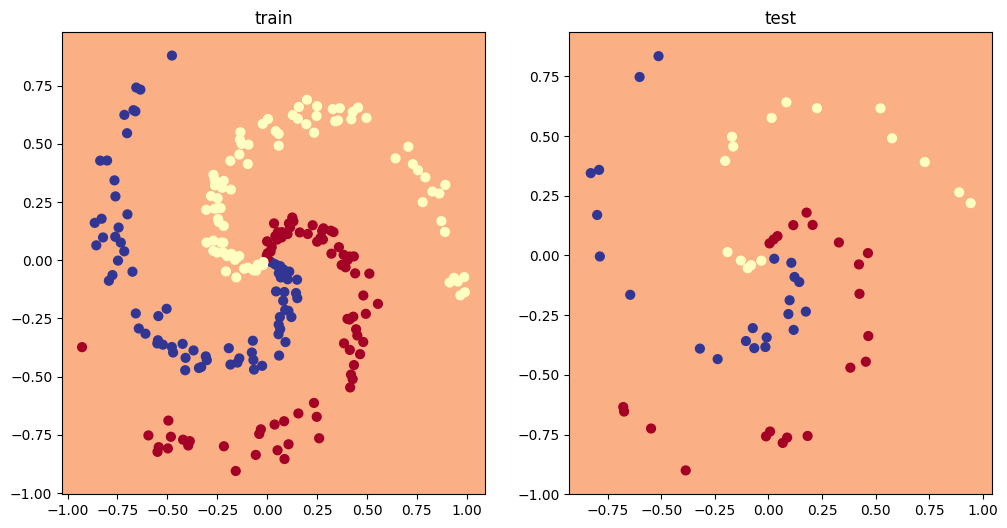

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_sprial , X_sprial_train , y_sprial_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_sprial , X_sprial_test , y_sprial_test)